In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from scipy import stats
from scipy.stats import uniform
import matplotlib.patches as patches
from matplotlib.patches import Ellipse
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)


numpy version :  1.23.5
pandas version :  1.5.3
seaborn version :  0.12.2


# Load Data

In [2]:
# Melakukan import csv
df = pd.read_csv("marketing_campaign_data.csv")
df.head(12)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0
5,5,7446,1967,S2,Bertunangan,62513000.0,0,1,09-09-2013,16,...,6,0,0,0,0,0,0,3,11,0
6,6,965,1971,S1,Cerai,55635000.0,0,1,13-11-2012,34,...,6,0,0,0,0,0,0,3,11,0
7,7,6177,1985,S3,Menikah,33454000.0,1,0,08-05-2013,32,...,8,0,0,0,0,0,0,3,11,0
8,8,4855,1974,S3,Bertunangan,30351000.0,1,0,06-06-2013,19,...,9,0,0,0,0,0,0,3,11,1
9,9,5899,1950,S3,Bertunangan,5648000.0,1,1,13-03-2014,68,...,20,1,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [4]:
df.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#  Feature engineering:

### conversion rate

In [5]:
df['conversion_rate'] = df['Response'] / df['NumWebVisitsMonth']
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,conversion_rate
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,0,0,0,0,0,3,11,1,0.142857
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,0,0,0,0,0,0,3,11,0,0.000000
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,0,0,0,0,0,0,3,11,0,0.000000
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,0,0,0,0,0,0,3,11,0,0.000000
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,0,0,0,0,0,0,3,11,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,0,0,0,0,0,0,3,11,0,0.000000
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,0,0,0,1,0,0,3,11,0,0.000000
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,0,1,0,0,0,0,3,11,0,0.000000
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,0,0,0,0,0,0,3,11,0,0.000000


### umur

In [6]:
def kelompok_usia(x):
    if x['Year_Birth'] <= 1954:
        kelompok = 'Lansia'
    elif x['Year_Birth'] >= 1955 and x['Year_Birth'] <= 1993: 
        kelompok = 'Dewasa'
    else: 
        kelompok  = 'Remaja'
    return kelompok  

df['grup_umur'] = df.apply(lambda x: kelompok_usia(x), axis=1)

### jumlah anak, total transaksi, total pengeluaran

In [7]:
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumWebVisitsMonth']
df['jumlah_anak'] = df['Kidhome'] + df['Teenhome']
df['total_pembelian'] = df['MntCoke']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df['Total_Transaksi'] = df['Income'] - df['total_pembelian'] 
df['total_acc_cmp'] = df['AcceptedCmp2'] + df['AcceptedCmp1'] + df['AcceptedCmp5'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] 


 ### Kesejahteraan masyakat

In [8]:
def kesejahteraan_masyakat(x):
    if x['Income'] >= 5.174150e+07:
        kelompok = 'Kaya'
    else: 
        kelompok  = 'Biasa aja'
    return kelompok  

df['grup_income'] = df.apply(lambda x: kesejahteraan_masyakat(x), axis=1) 

### Status

In [9]:
# replace value
df = df.replace({'Marital_Status': {'Duda':'Lajang',
                                   'Janda' : 'Lajang',
                                   'Cerai': 'Lajang',
                                   'Bertunangan' : 'Menikah'}})
df.replace("Menikah", "Couple", inplace=True)
df.replace("Lajang", "Single", inplace=True)

df['Marital_Status'].value_counts()

Couple    1444
Single     796
Name: Marital_Status, dtype: int64

# Exploration Data Analysis

## Descriptive Statistics

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [11]:
# Pengelompokan kolom berdasarkan jenisnya
num = ['int64', 'int32', 'int16', 'float64', 'float32', 'float16']
num = df.select_dtypes(include=num)
num.drop(columns=['Response','Unnamed: 0','ID','Z_CostContact','Z_Revenue'],inplace=True)
num = num.columns
cats = ['Education','Marital_Status','grup_umur','grup_income']

In [12]:
df[num].describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,conversion_rate,Total_Purchases,jumlah_anak,total_pembelian,Total_Transaksi,total_acc_cmp
count,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2229.000000,2240.000000,2240.000000,2.240000e+03,2.216000e+03,2240.000000
mean,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,...,0.072768,0.064286,0.013393,0.009375,0.043686,20.178571,0.950446,6.057982e+05,5.164018e+07,0.297768
std,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,...,0.259813,0.245316,0.114976,0.096391,0.142981,7.293275,0.751803,6.022493e+05,2.477466e+07,0.678381
min,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+03,7.170000e+05,0.000000
25%,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,6.875000e+04,3.516775e+07,0.000000
50%,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.000000,3.960000e+05,5.104650e+07,0.000000
75%,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,1.000000,1.045500e+06,6.713450e+07,0.000000
max,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,3.000000,2.525000e+06,6.666040e+08,4.000000


In [13]:
df[cats].describe()

,Education,Marital_Status,grup_umur,grup_income
count,2240,2240,2240,2240
unique,5,2,3,2
top,S1,Couple,Dewasa,Biasa aja
freq,1127,1444,1911,1144


###  **Univariate Analysis**

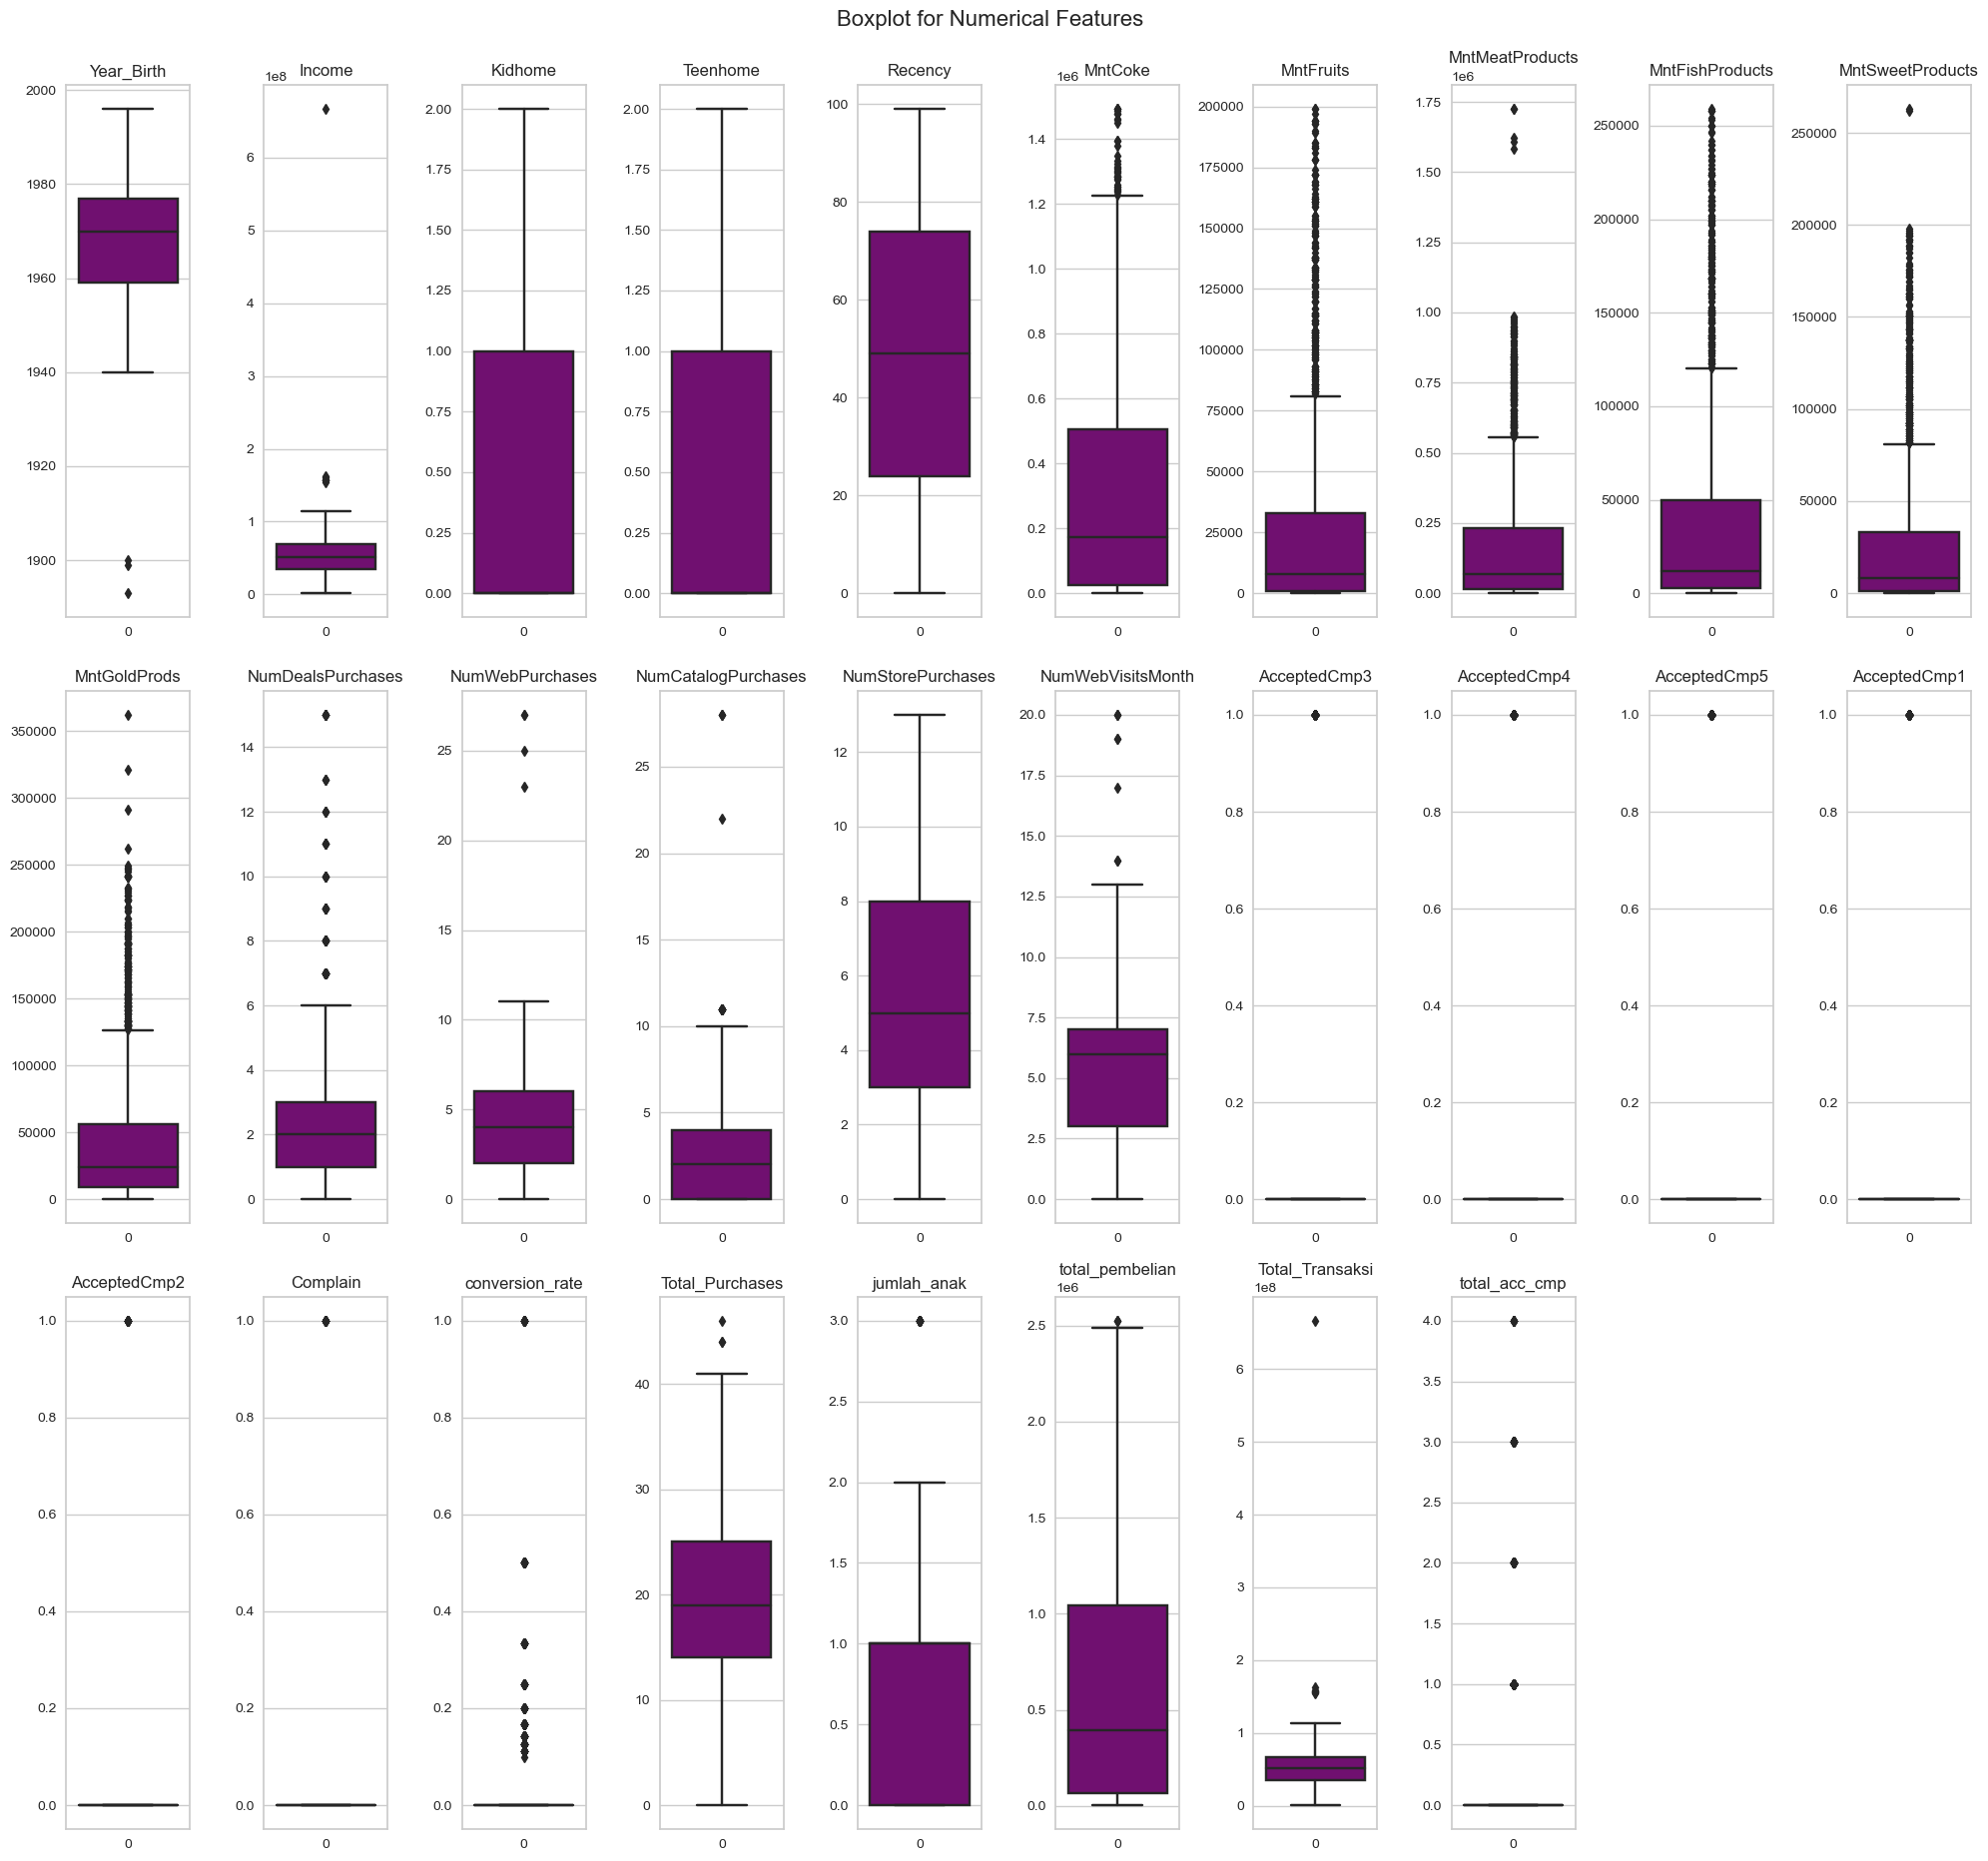

In [14]:
plt.figure(figsize=(20, 19))
for i in range(0, len(num)):
    plt.subplot(3,10, i+1)
    sns.boxplot(df[num[i]], color='purple')
    plt.title(format(num[i]))
    plt.suptitle('Boxplot for Numerical Features\n', fontsize=16, fontweight='medium')
    plt.tight_layout()
plt.show()

dapat dilihat dari boxplot diatas, tidak ada outlier yang tidak terlalu jauh dari data lainnya dan tidak mempengaruhi hasil analisis data

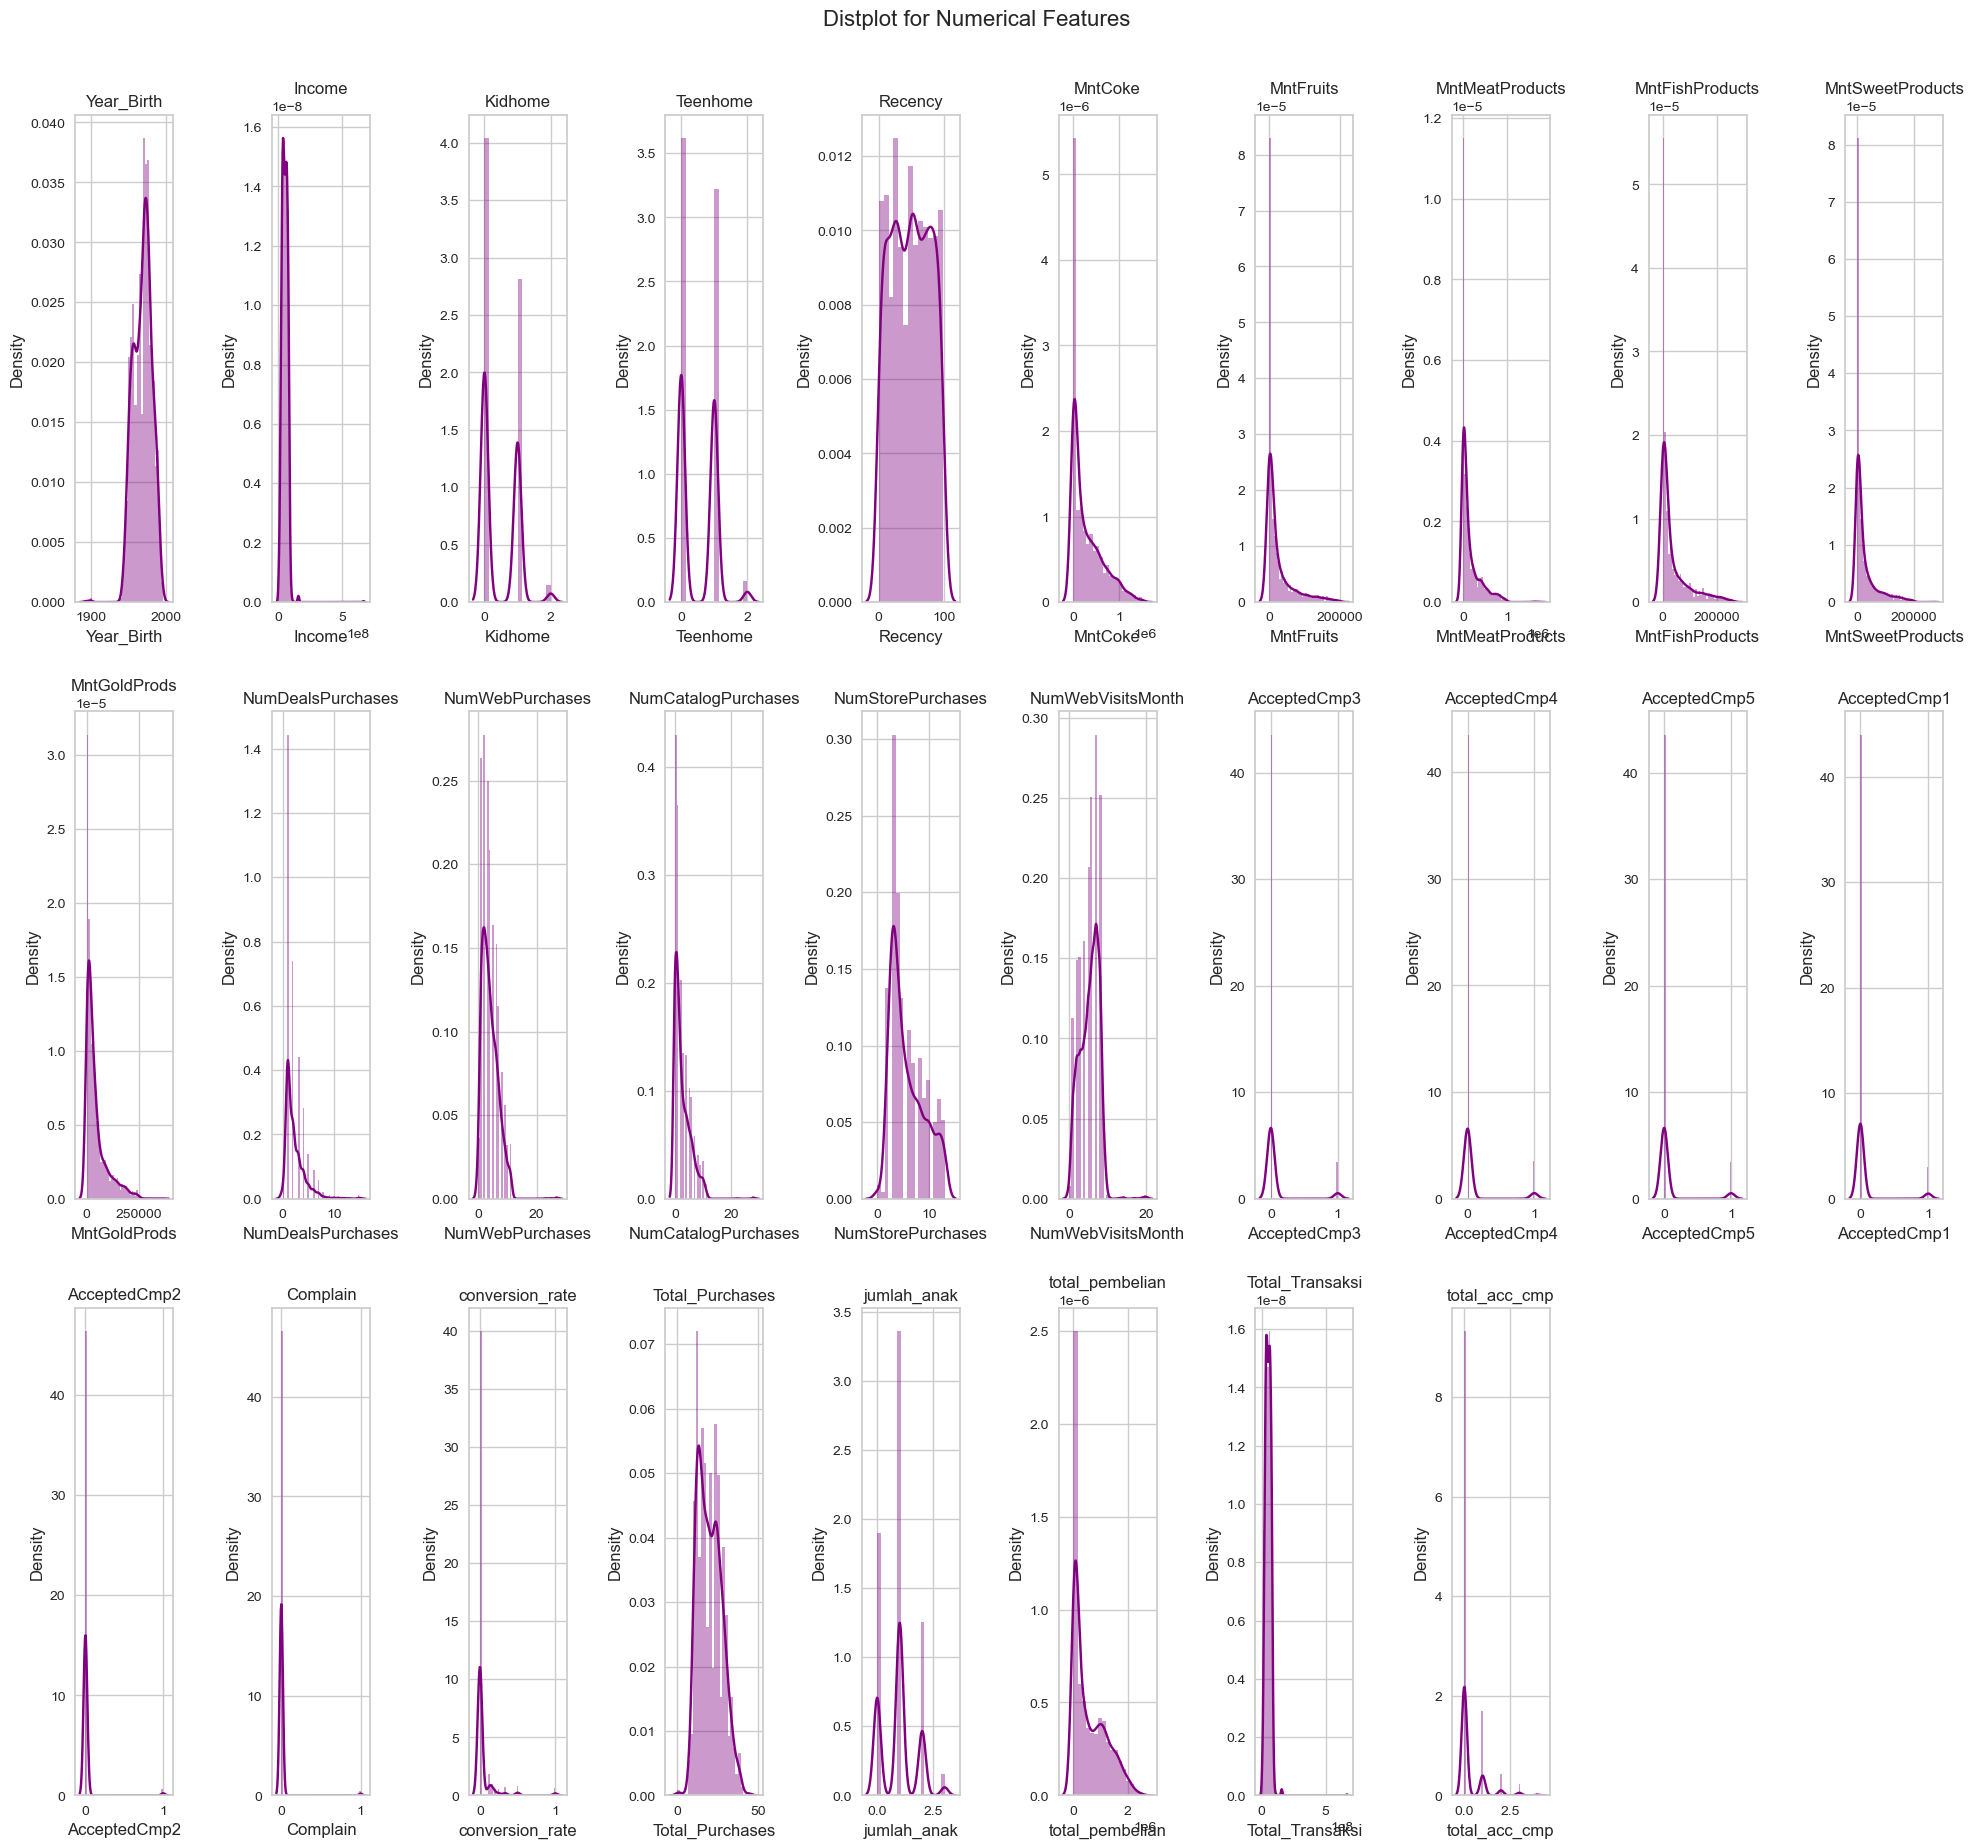

In [15]:
plt.figure(figsize=(20, 19))
for i in range(0, len(num)):
    plt.subplot(3,10, i+1)
    sns.distplot(df[num[i]], color='purple')
    plt.title(format(num[i]))
    plt.suptitle('Distplot for Numerical Features\n', fontsize=16, fontweight='medium')
    plt.tight_layout(pad=2)

* distribusi normal dimiliki 'total_transaksi', NumWebVisitsMonth, NumStorePurchases, NumWebPurchases, NumDealsPurchases, Recency, Year_Birth
* positively skewed dimiliki MntCoke, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, conversion_rate
* bimodal atau lebih dari 1 dimiliki total_acc_cmp, jumlah_anak, Kidhome, Teenhome

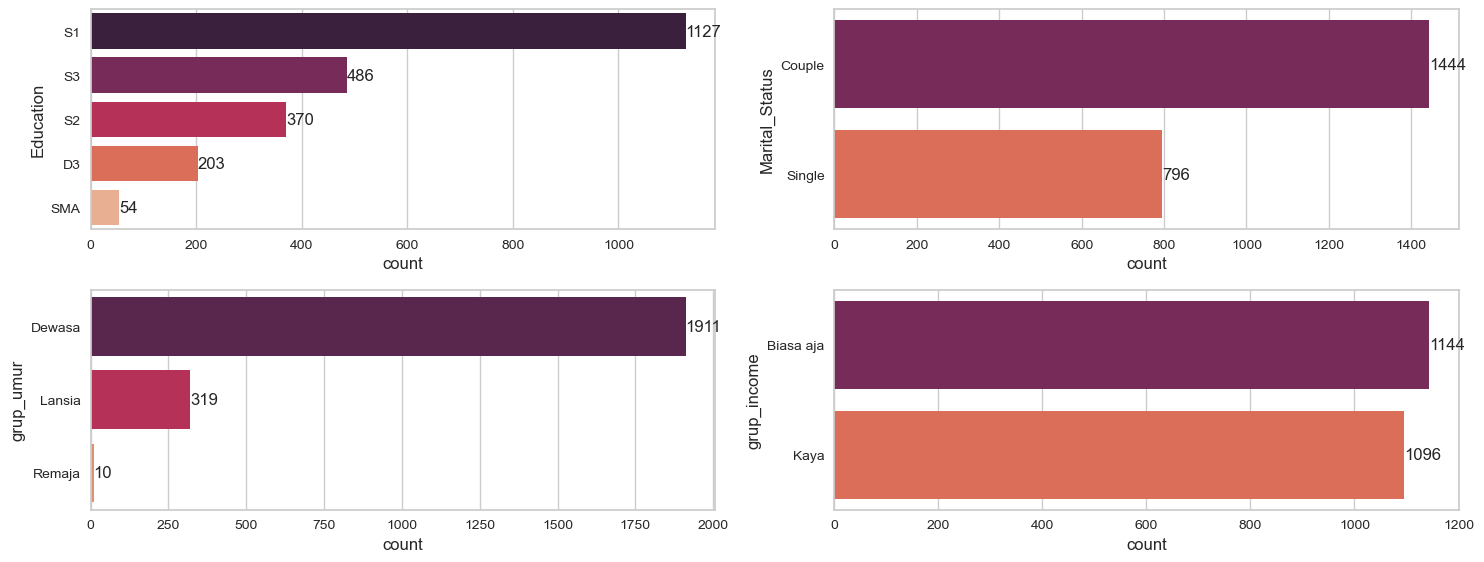

In [16]:
plt.figure(figsize=(15, 25))
for i in range(len(cats)):
    plt.subplot(9, 2, i+1)
    ax = sns.countplot(y=cats[i], data=df, palette='rocket', order=df[cats[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    plt.tight_layout()

### Multivariate Analysis

<Axes: >

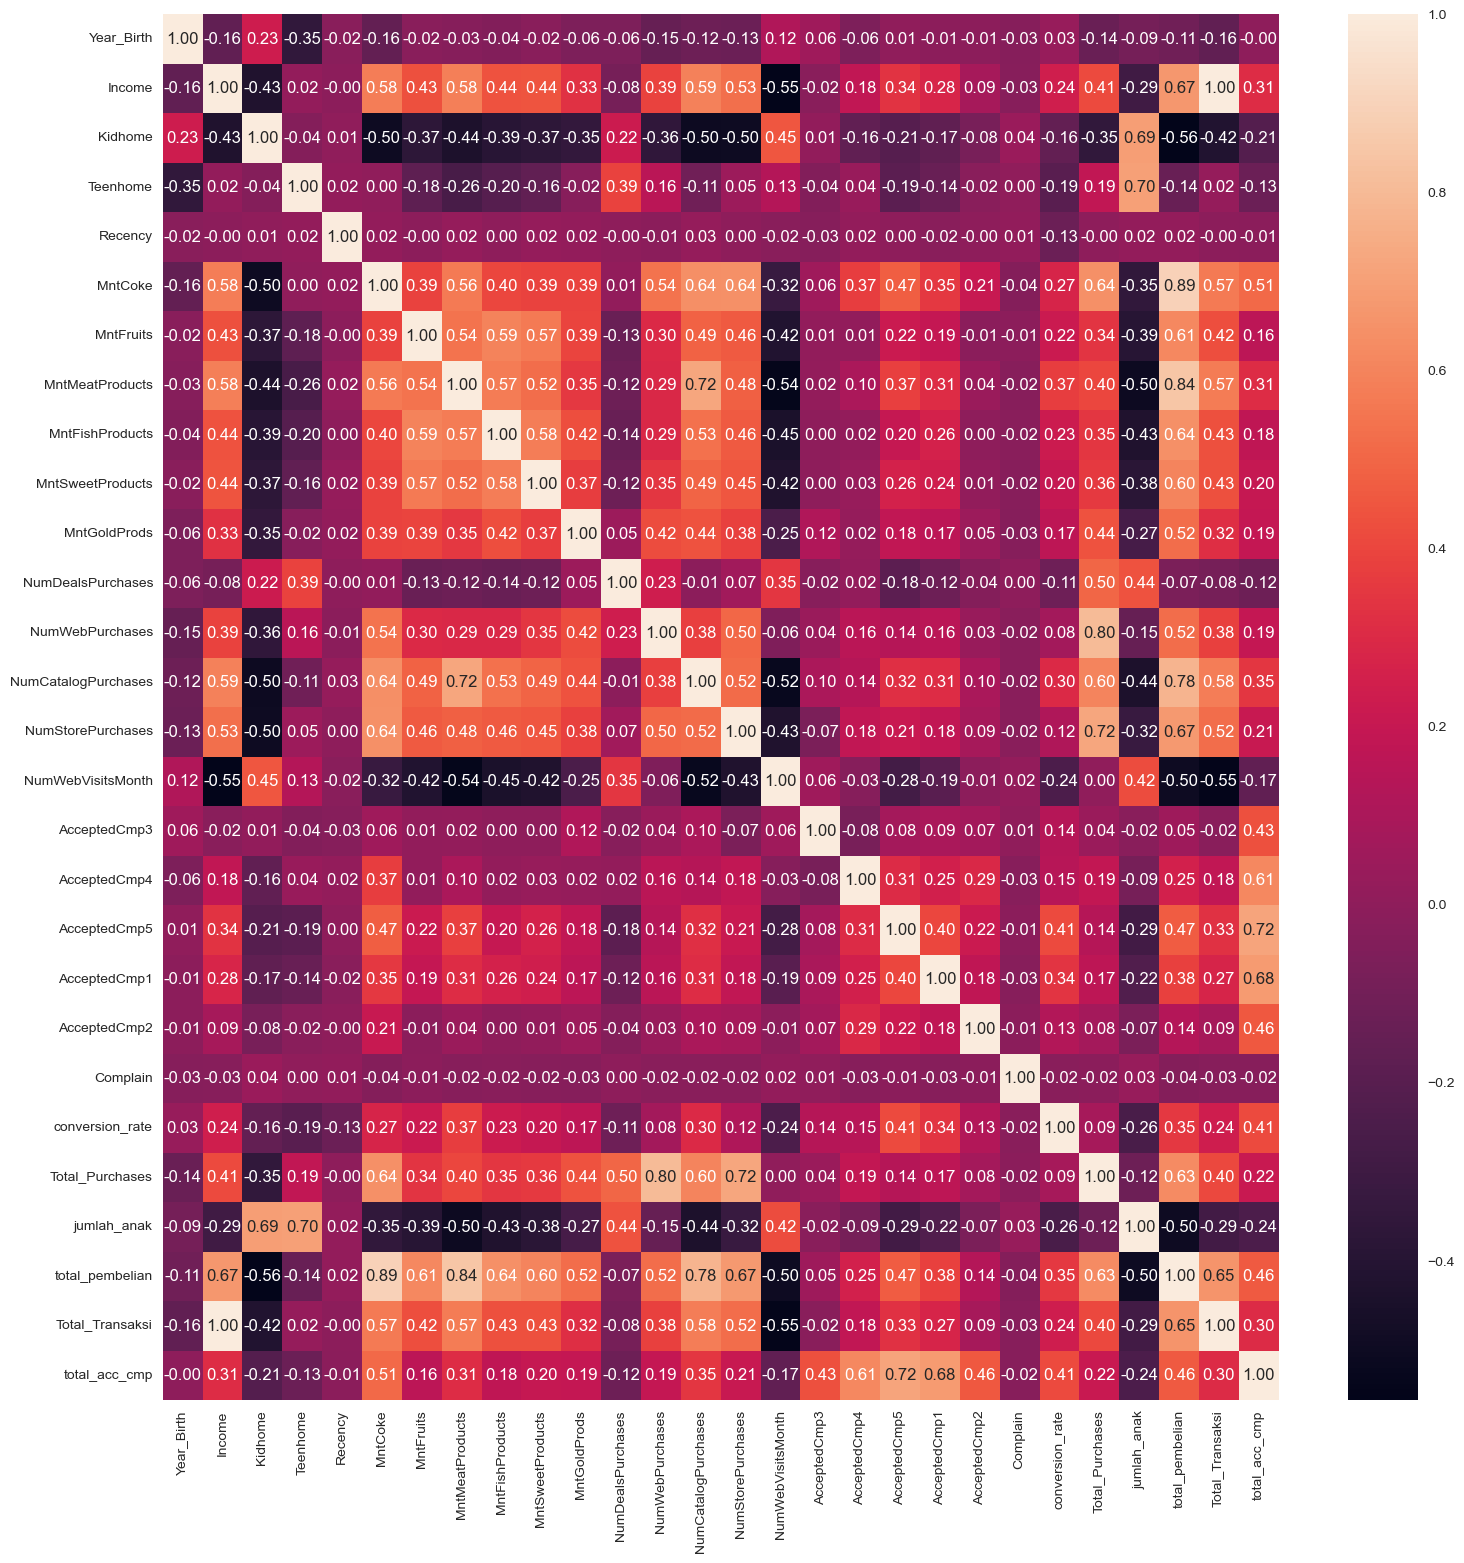

In [17]:
plt.figure(figsize=(18, 18))
sns.heatmap(df[num].corr(), cmap='rocket', annot=True, fmt='.2f')

### Apakah terdapat hubungan yang signifikan antara umur customer dengan conversion rate

In [18]:
# Create correlation age with conversion_rate
agg_age = df.groupby('grup_umur',).agg({'conversion_rate' : 'sum'}).reset_index()
agg_age['total_conversion_rate_grupumur'] = df['conversion_rate'].sum()
agg_age['percentage'] = round((agg_age['conversion_rate'] / agg_age['total_conversion_rate_grupumur'])*100,2)
agg_age

,grup_umur,conversion_rate,total_conversion_rate_grupumur,percentage
0,Dewasa,80.830159,97.375794,83.01
1,Lansia,15.934524,97.375794,16.36
2,Remaja,0.611111,97.375794,0.63


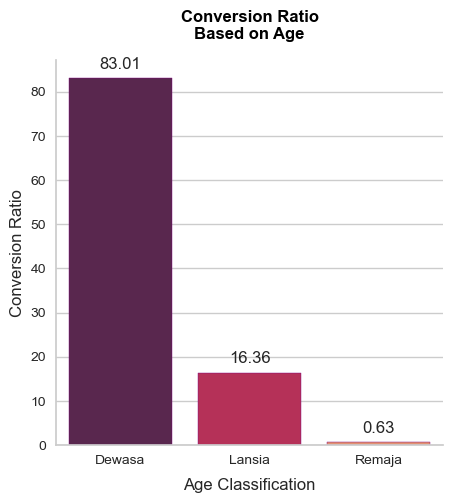

In [19]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.title("Conversion Ratio\nBased on Age", fontsize=12, color='black', weight='bold', pad = 15)
sns.barplot(data = agg_age, x = 'grup_umur', y = 'percentage', palette = 'rocket', edgecolor = 'purple')
plt.xlabel('Age Classification', labelpad = 8)
plt.bar_label(ax.containers[0], padding=5)
plt.ylabel('Conversion Ratio')

sns.despine()
     

interpretasi:
* terdapat hubungan yang signifikan antara umur customer dengan conversion rate, dimana seseorang yang dewasa cenderung berpengaruh terhadap convertion rate dibanding remaja dan lansia, dikarenakan pada umur dewasa berada di usia aktif dan memiliki income yang lebih besar dibandingkan dengan remaja dan lebih aktiv dibanding lansia

### Membuat plot yang dapat menunjukkan hubungan antara conversion rate dan jenis user yang berpotensi lebih besar untuk merespon campaign

In [20]:
# Create correlation age with conversion_rate
jml_anak = df.groupby('jumlah_anak').agg({'conversion_rate' : 'sum', 'Response' : 'sum'}).reset_index()
jml_anak['total_conversion_rate_jmlanak'] = df['conversion_rate'].sum()
jml_anak['percentage'] = round((jml_anak['conversion_rate'] / jml_anak['total_conversion_rate_jmlanak'])*100,2)
jml_anak

,jumlah_anak,conversion_rate,Response,total_conversion_rate_jmlanak,percentage
0,0,73.066667,169,97.375794,75.04
1,1,17.356349,116,97.375794,17.82
2,2,6.667063,47,97.375794,6.85
3,3,0.285714,2,97.375794,0.29


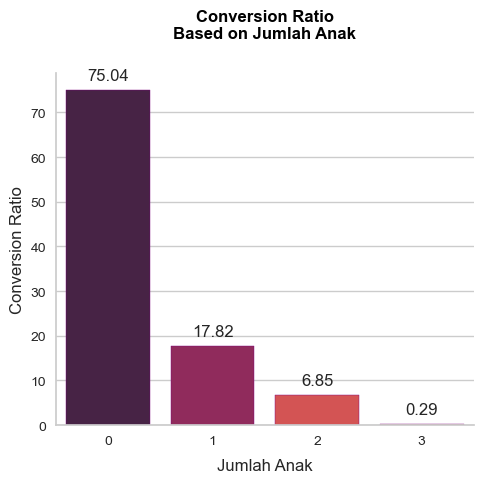

In [21]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.title("Conversion Ratio\nBased on Jumlah Anak", fontsize=12, color='black', weight='bold', pad = 25)
sns.barplot(data = jml_anak, x = 'jumlah_anak', y = 'percentage', palette = 'rocket', edgecolor = 'purple')
plt.xlabel('Jumlah Anak', labelpad = 8)
plt.ylabel('Conversion Ratio')
plt.tight_layout()
plt.bar_label(ax.containers[0], padding=5)

sns.despine()
     

grafik diatas merupakan hubungan antara conversion rate dan jumlah anak yang berpotensi lebih besar untuk merespon campaign, dapat dilihat seseorang yang tidak memiliki anak cenderung menghasilkan convertion rate lebih banyak dibandingkan dengan yang memiliki anak

In [22]:
# Create correlation age with conversion_rate
grup_inc = df.groupby('grup_income').agg({'conversion_rate' : 'sum', 'Response' : 'sum'}).reset_index()
grup_inc['total_conversion_rate_ttransaksi'] = df['conversion_rate'].sum()
grup_inc['percentage'] = round((grup_inc['conversion_rate'] / grup_inc['total_conversion_rate_ttransaksi'])*100,2)
grup_inc

,grup_income,conversion_rate,Response,total_conversion_rate_ttransaksi,percentage
0,Biasa aja,18.676587,129,97.375794,19.18
1,Kaya,78.699206,205,97.375794,80.82


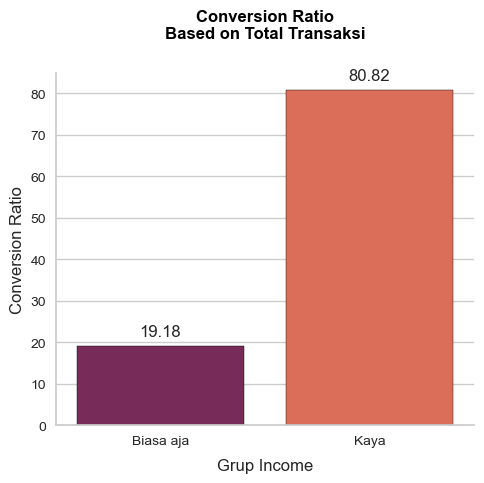

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.title("Conversion Ratio\nBased on Total Transaksi", fontsize=12, color='black', weight='bold', pad = 25)
sns.barplot(data = grup_inc, x = 'grup_income', y = 'percentage', palette = 'rocket', edgecolor = 'black')
plt.xlabel('Grup Income', labelpad = 8)
plt.ylabel('Conversion Ratio')
plt.tight_layout()
plt.bar_label(ax.containers[0], padding=5)

sns.despine()
     

grafik diatas merupakan hubungan antara conversion rate dan income yang berpotensi lebih besar untuk merespon campaign, dapat dilihat seseorang yang memiliki income lebih banyak dibandingkan dengan yang biasa aja, cenderung akan memiliki nilai convertion rate lebih tinggi dibandingkan dengan seseorang yang memiliki convertion rate lebih rendah

# Data Preprocessing

In [24]:
print(df.isnull().values.any())
print(df.isna().sum())

True
Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
conversion_rate        11
grup_umur               0
Total_Purchases         0
jumlah_anak             0
total_pembelian         0
Total_Transaksi        24
total_acc_cmp           0
grup_income             0
dtype: 

### Handling Missing Value

In [25]:
df['Income'].fillna(df['Income'].mean(), inplace=True)
df['conversion_rate'] = df['conversion_rate'].fillna(0)
df['Total_Transaksi'].fillna(df['Total_Transaksi'].mean(), inplace=True)


### Handling Duplicated Data


In [26]:
# cek duplikate
df.duplicated().sum()

0

In [27]:
# Cek kembali  Data Null
print(df.isnull().values.any())
print(df.isna().sum())

False
Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
conversion_rate        0
grup_umur              0
Total_Purchases        0
jumlah_anak            0
total_pembelian        0
Total_Transaksi        0
total_acc_cmp          0
grup_income            0
dtype: int64


### Membuang data yang tidak diperlukan

In [28]:
df.drop(columns = ['Unnamed: 0','ID', 'Kidhome', 'Teenhome','Z_CostContact', 'Z_Revenue','Dt_Customer'], inplace=True)

## Melakukan feature encoding

In [29]:
df['Education'] = df['Education'].map({'S3' : 4, 'S2' : 3, 'S1':2, 'D3':1, 'SMA':0})
df['grup_income'] = df['grup_income'].map({'Kaya':1, 'Biasa aja':0})
df['grup_umur'] = df['grup_umur'].map({'Dewasa' : 1, 'Lansia': 0, 'Remaja':2})
df['Marital_Status'] = df['Marital_Status'].map({'Single' : 0, 'Couple' : 1})


## Melakukan standardisasi pada feature

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scd = StandardScaler()
y_fit = scd.fit_transform(df.astype(float))
y_fit

array([[-0.98534473, -0.45838256, -1.34687429, ...,  0.19811737,
        -0.43903713,  1.02166316],
       [-1.23573295, -0.45838256, -1.34687429, ..., -0.21607287,
        -0.43903713, -0.97879618],
       [-0.3176428 , -0.45838256,  0.74245979, ...,  0.77921768,
        -0.43903713,  1.02166316],
       ...,
       [ 1.01776106, -0.45838256, -1.34687429, ...,  0.16641583,
         1.03539042,  1.02166316],
       [-1.06880747,  0.53752135,  0.74245979, ...,  0.68037867,
        -0.43903713,  1.02166316],
       [-1.23573295,  1.53342527,  0.74245979, ...,  0.04289751,
        -0.43903713,  1.02166316]])

# K-Means Clustering - PCA

## Melihat jumlah cluster yang tepat dengan menggunakan elbow method

In [31]:

cluster = df[['Recency', 'Total_Purchases', 'total_pembelian']].copy()
cluster.columns = ['Recency','Frequency','Monetary']
features = ['Recency','Frequency','Monetary']
# df2.columns = ['R', 'F', 'M', 'C']
cluster.describe(include='all')

,Recency,Frequency,Monetary
count,2240.000000,2240.000000,2.240000e+03
mean,49.109375,20.178571,6.057982e+05
std,28.962453,7.293275,6.022493e+05
min,0.000000,0.000000,5.000000e+03
25%,24.000000,14.000000,6.875000e+04
50%,49.000000,19.000000,3.960000e+05
75%,74.000000,25.000000,1.045500e+06
max,99.000000,46.000000,2.525000e+06


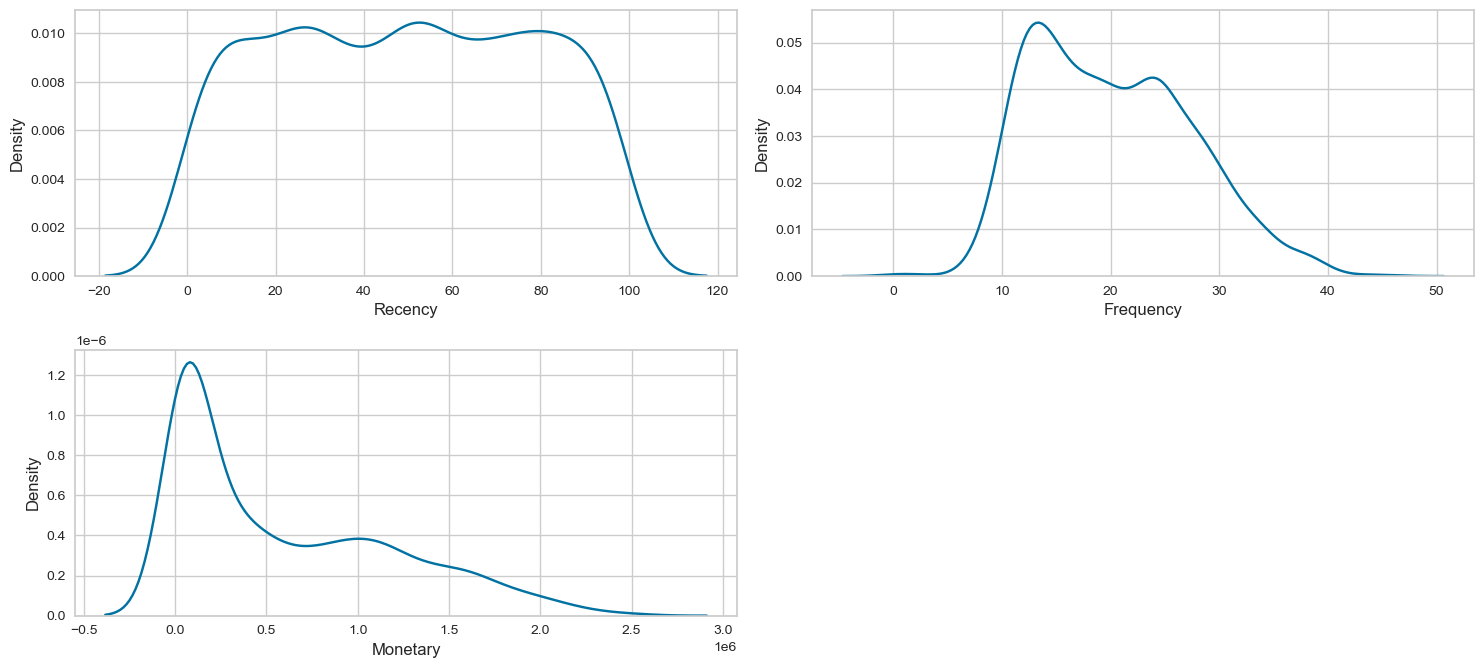

In [32]:
cols = cluster.columns

plt.figure(figsize= (15, 20))
for i in range(len(cols)):
    plt.subplot(6, 2, i+1)
    sns.kdeplot(x = cluster[cols[i]])
    plt.tight_layout()

### Handling Outliers

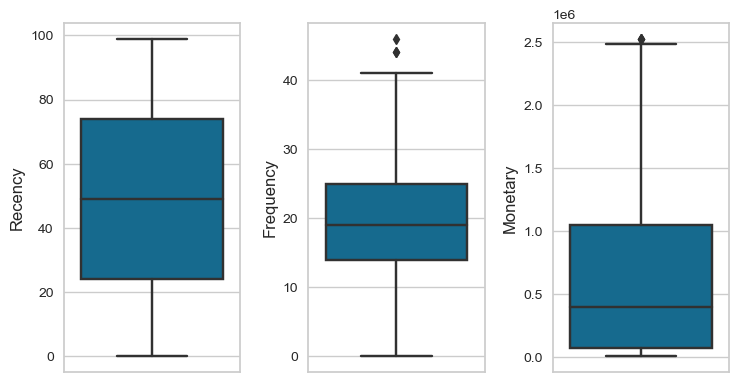

In [33]:
cols = cluster.columns
plt.figure(figsize= (10,15))
for i in range(len(cols)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = cluster[cols[i]], orient='v')
    plt.tight_layout()

In [34]:
for col in cols:
    high_cut = cluster[col].quantile(q=0.99)
    low_cut= cluster[col].quantile(q=0.01)
    cluster.loc[cluster[col]>high_cut,col]=high_cut
    cluster.loc[cluster[col]<low_cut,col]=low_cut

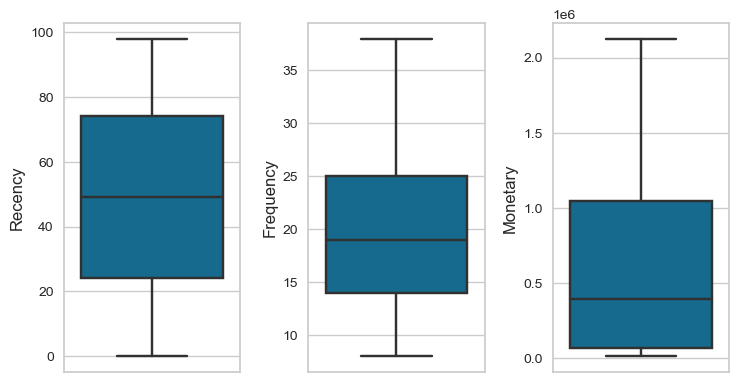

In [35]:
plt.figure(figsize= (10,15))
for i in range(len(cols)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = cluster[cols[i]], orient='v')
    plt.tight_layout()

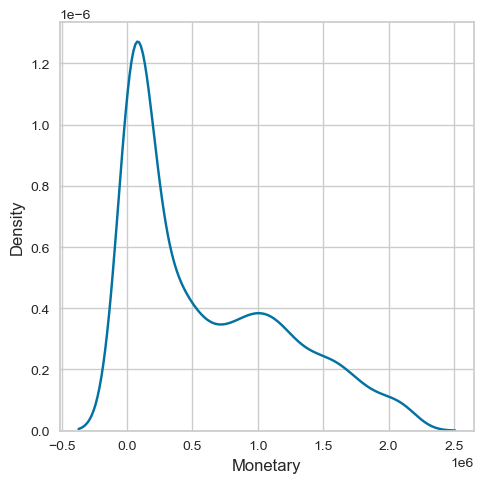

In [36]:
#column M distribution is right-skewed

plt.figure(figsize= (5, 5))
sns.kdeplot(x = cluster['Monetary'])
plt.tight_layout()

agar distribusi normal, mari kita transformasi

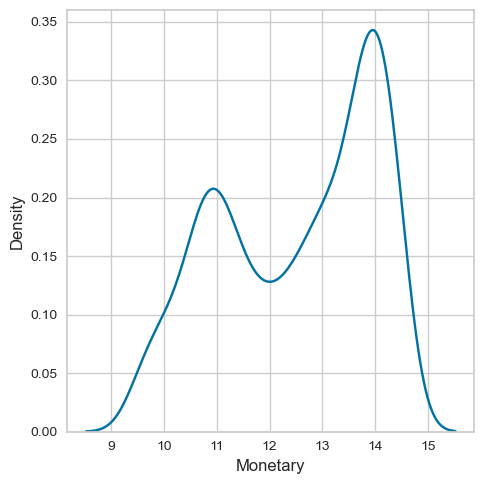

In [37]:
#log tranformation on column `M`

tf_log = cluster.copy()
tf_log['Monetary'] = np.log(cluster['Monetary'])

plt.figure(figsize= (5, 5))
sns.kdeplot(x = tf_log['Monetary'])
plt.tight_layout()

In [38]:
# Melakukan standarisasi menggunakan StandardScaler
scaler = StandardScaler()
scaler.fit(cluster)
x_std = scaler.transform(cluster)
df_std = pd.DataFrame(x_std, columns = cluster.columns)

## Melakukan implementasi clustering dengan menggunakan k-means clustering


In [39]:
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init=10, random_state = 42)
    kmeans.fit(y_fit)
    inertia.append(kmeans.inertia_)

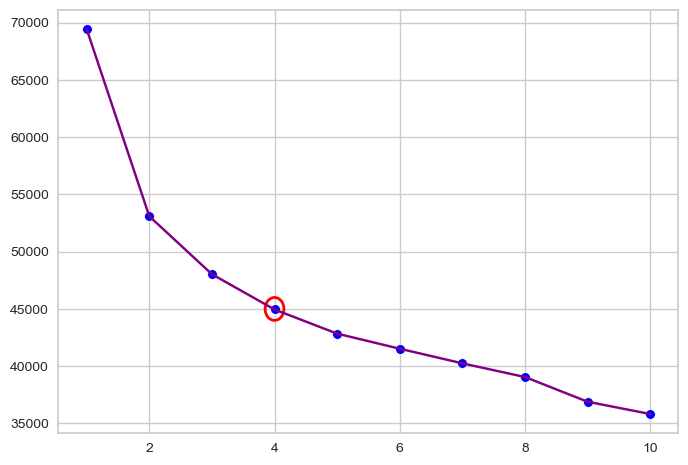

In [40]:
sns.lineplot(x=range(1,11), y = inertia, color = 'purple')
sns.scatterplot(x=range(1,11), y = inertia, s = 50, color = 'blue')
circle = Ellipse((4, 45000), width=0.3, height=2000, color='red', fill=False, linewidth=2)
plt.gca().add_patch(circle)
# plt.gca().autoscale_view()
plt.show()

Terlihat kemiringannya mulai berkurang dari 4 menjadi 5. sehingga akan dipilih n_cluster = 4 untuk melakukan model clustering k-means


## Menghitung sillhouette score melihat bagaimana performa model yang didapat

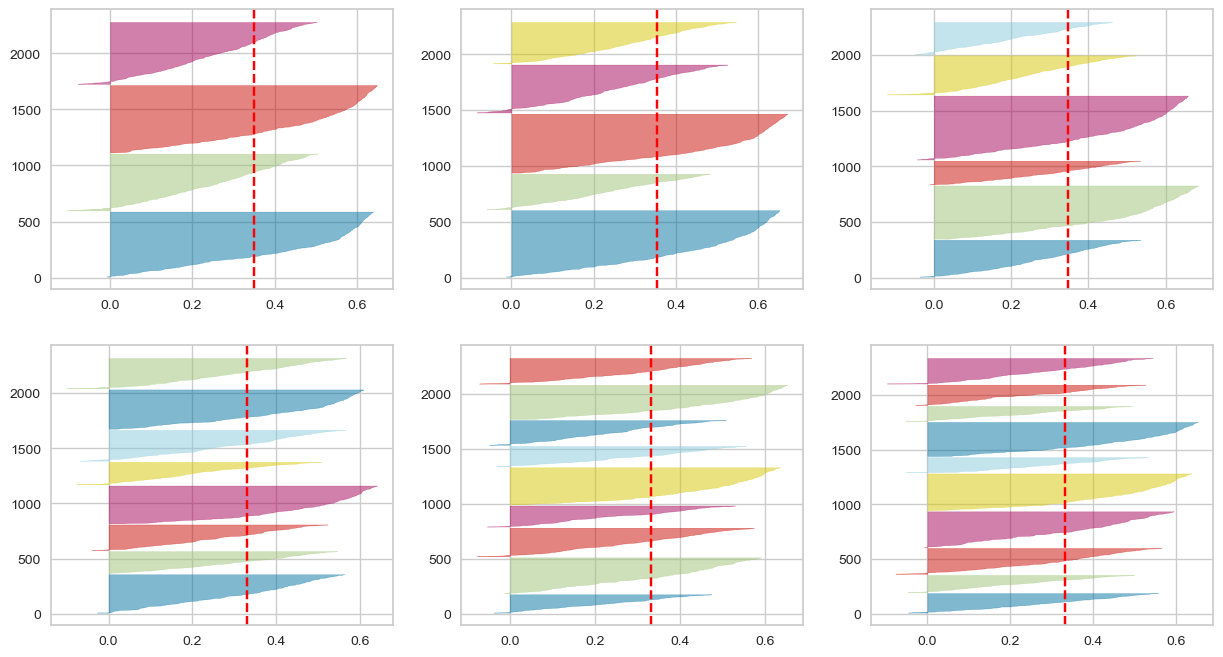

In [41]:
n_cluster = [4,5,6,8,9,10]
fig, ax = plt.subplots(2, 3, figsize=(15,8))
for i in n_cluster:
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 4)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_std)


Silhoutte score yang bagus adalah yang kanan bagian bawah dengan memiliki nilai rata-rata 0,6 sehingga performa model yang didapat dari silhouette score juga lebih baik. Selain itu, jika diperhatikan. Secara umum, nilai silhoutte yang mendekati 1 menunjukkan bahwa pengelompokan data dalam cluster tersebut sangat baik. 

In [42]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_std)
df_std['Labels'] = kmeans.labels_
df_std.sample(5)

,Recency,Frequency,Monetary,Labels
1556,1.102103,0.669386,-0.609605,0
768,1.447609,-1.135644,-0.705048,0
1866,0.998451,-0.857947,-0.919374,0
628,1.551261,-0.302553,-0.839002,0
638,0.134686,1.780174,1.461659,3


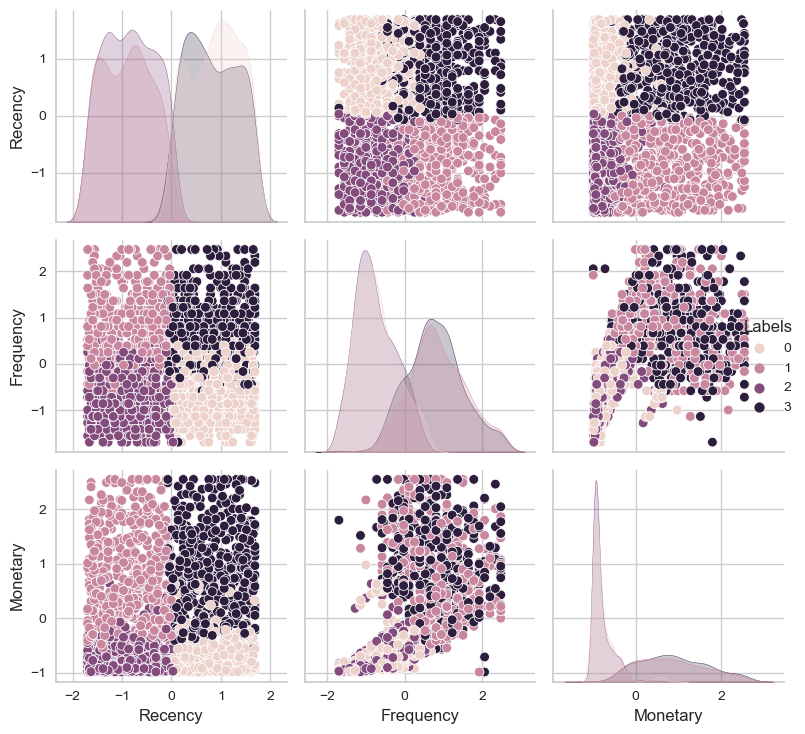

In [43]:
import random
colors = ['#D6EFED','#E0BBe4','#B7D3DF','#957DAD','#E9B666','#F8F3E8','#E6F8F6','#F8DBB8','#CDE8E6','#F6C7B3','#5B96A9']

sns.pairplot(data=df_std, hue='Labels', diag_kind='kde', palette=(random.shuffle(colors)))
plt.tight_layout()

## Principal Component Analysis

In [44]:
# Memisahkan dataframe Labels
y = pd.DataFrame(df_std['Labels'].values, columns=['Labels'])

In [45]:
# Melakukan PCA
pca = PCA(n_components=2)

pca.fit(df_std)
pcas = pca.transform(df_std)

# Mengubah hasil pca ke dataframe
df_pca = pd.DataFrame(data = pcas, columns = ['PC1', 'PC2'])
df_pca.describe()

,PC1,PC2
count,2.240000e+03,2.240000e+03
mean,2.379049e-18,-3.291018e-17
std,1.429574e+00,1.007211e+00
min,-2.436091e+00,-1.922555e+00
25%,-1.059562e+00,-8.748119e-01
50%,-8.134562e-02,-8.730805e-02
75%,1.193077e+00,8.559885e-01
max,3.608244e+00,2.050324e+00


In [46]:
# Menggabungkan dataframe df_pca dan y
df_pca['Labels'] = y
df_pca.sample(5)

,PC1,PC2,Labels
1108,-0.018405,0.899889,1
1984,0.212962,-0.210088,1
28,-0.796145,1.115045,2
1018,-0.793453,1.947545,2
344,-0.898838,1.571029,2


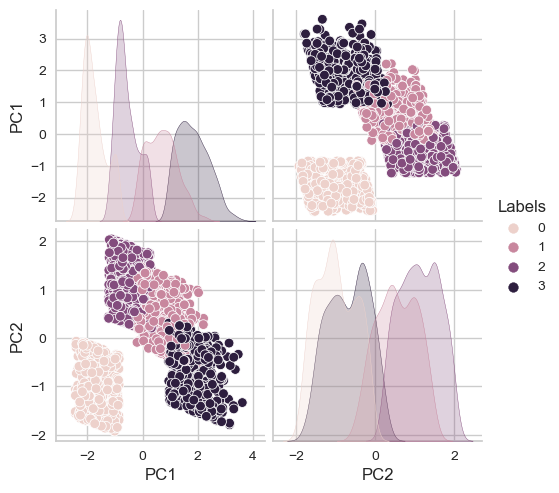

In [47]:
# Membandingkan hasil scatter plot PCA dengan scatter plot sebelumnya
sns.pairplot(data=df_pca, hue='Labels', diag_kind='kde', palette=(random.shuffle(colors)))
plt.tight_layout(rect = (2,2,2,2))

Text(0.5, 1.0, 'Customer Segmentation Based on RFM Model')

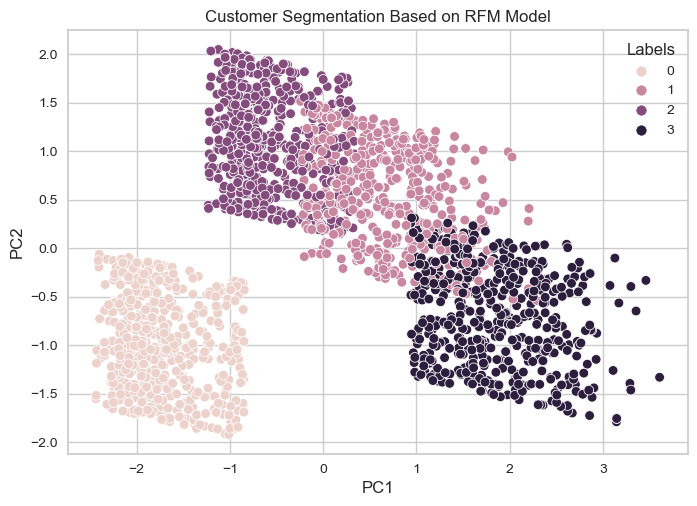

In [48]:
# Melihat distribusi label dengan scatter plot
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Labels", palette=(random.shuffle(colors)))
plt.title('Customer Segmentation Based on RFM Model')

# Customer Personality Analysis for Marketing Retargeting

In [49]:
# Memasukkan labels ke dataframe asli (sebelum standarisasi)
cluster['Labels'] = kmeans.labels_

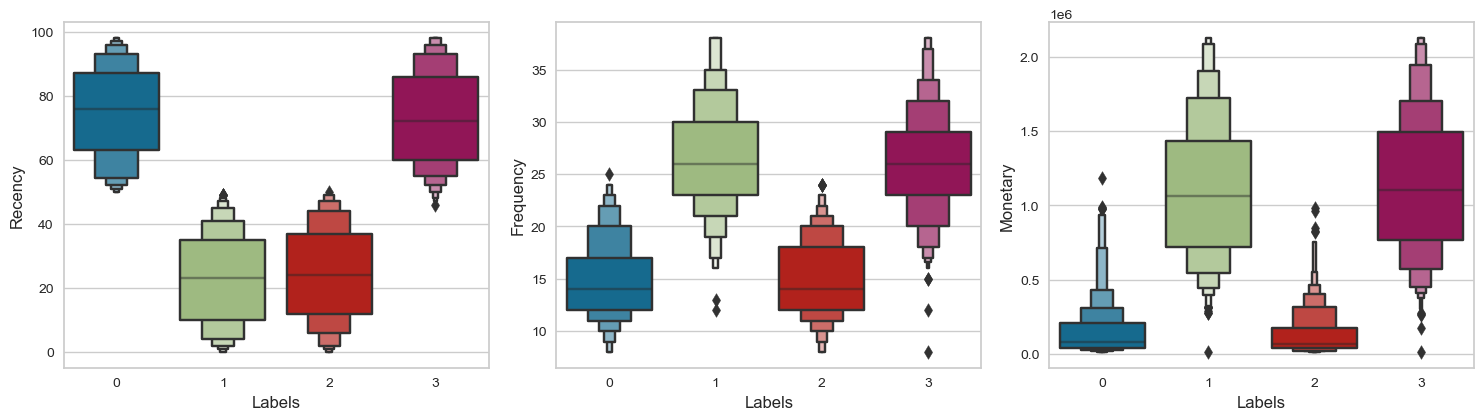

In [50]:
f_clust = cluster.copy()
clust = f_clust.columns.drop('Labels')

plt.figure(figsize= (15, 8))
for i in range(len(clust)):
    plt.subplot(2, 3, i+1)
    sns.boxenplot(x=df_std['Labels'], y=f_clust[clust[i]])
    plt.tight_layout()

In [51]:
def mode(data):
    return stats.mode(data)[0][0]
# Melihat mean, median, modus
cluster.groupby(['Labels']).agg(['mean','median','std'])

Recency                    Frequency                       Monetary  \
             mean median        std       mean median       std          mean   
Labels                                                                          
0       74.646552   76.0  14.497724  14.931034   14.0  3.820055  1.525052e+05   
1       22.911243   23.0  14.212879  26.404339   26.0  5.203015  1.099937e+06   
2       24.587354   24.0  14.656493  14.765391   14.0  3.729146  1.333394e+05   
3       73.007246   72.0  14.805207  25.869565   26.0  5.145189  1.135607e+06   

                                  
           median            std  
Labels                            
0         78500.0  184149.705302  
1       1062000.0  473676.504369  
2         69000.0  146787.231253  
3       1102500.0  468204.229900

In [52]:
# Melihat max, min, mode
cluster.groupby(['Labels']).agg(['max', 'min', 'mean'])

Recency                Frequency                Monetary         \
           max min       mean       max min       mean      max    min   
Labels                                                                   
0           98  50  74.646552        25   8  14.931034  1187000  13000   
1           49   0  22.911243        38  12  26.404339  2126000  13000   
2           50   0  24.587354        24   8  14.765391   981000  13000   
3           98  46  73.007246        38   8  25.869565  2126000  13000   

                      
                mean  
Labels                
0       1.525052e+05  
1       1.099937e+06  
2       1.333394e+05  
3       1.135607e+06

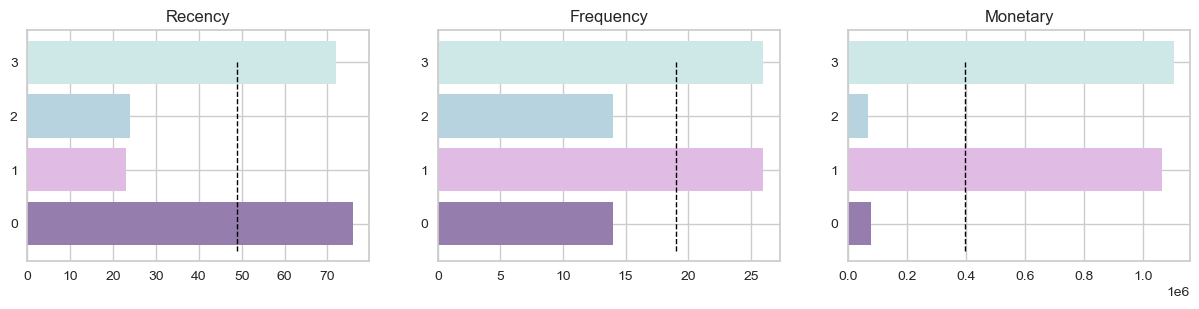

In [53]:
c = ['#957DAD','#E0BBe4','#B7D3DF','#CDE8E6']

def dist_feats(features):
    plt.figure(figsize=[len(features)*5,3])
    i = 1
    for feats in features:
        ax = plt.subplot(1,len(features),i)
        ax.vlines(cluster[feats].median(), ymin=-0.5, ymax=3, color='black', linewidth=1,  linestyle='--')
        dfg = cluster.groupby('Labels')
        x = dfg[feats].median().index
        y = dfg[feats].median().values
        ax.barh(x,y, color=c)
        plt.title(feats)
        i = i+1

dist_feats(features)

Insight untuk masing-masing features:
1. R, Recency, Semakin tinggi nilai frequency, maka semakin sering pelanggan melakukan pembelian.
2. F, Total_Purchases, Semakin tinggi nilai frequency, maka semakin sering pelanggan melakukan pembelian.
3. M, total Pembelian, Semakin tinggi nilai monetary, maka semakin banyak uang yang dikeluarkan pelanggan untuk pembelian.

Dari hasil visualisasi diatas kita dapat menarik kesimpulan bahwa,
1. Label 0 = memiliki pola R tinggi serta F dan M dibawah median.
2. Label 1 = memiliki pola F dan M tinggi serta R dibawah median.
3. Label 2 = memiliki pola F, M serta R dibawah median.
4. Label 3 = memiliki pola F, M serta R tinggi.


**Cluster 0: Most Loyal Customers**
>  pelanggan di cluster ini terakhir berinteraksi dengan bisnis 74 hari yang lalu, dengan frekuensi belanja yang rendah dengan pengeluaran tertinggi.

**Cluster 1: New Customers**
> pelanggan di cluster ini baru saja berinteraksi dengan bisnis dalam 22 hari terakhir, dengan frekuensi belanja yang tinggi dengan pengeluaran pengeluaran yang signifikan.

**Cluster 2: Impactful Customers**
> pelanggan di cluster ini baru saja berinteraksi dengan bisnis dalam 24 hari terakhir, dengan frekuensi belanja yang rendah dengan pengeluaran pengeluaran yang lumayan tinggi.

**Cluster 3: Passive Customers**
> pelanggan di cluster ini terakhir berinteraksi dengan bisnis 73 hari yang lalu, dengan frekuensi belanja yang tinggi dengan pengeluaran pengeluaran yang signifikan.

## Memilih cluster yang akan dilakukan marketing retargetting

Cluster 3 & Cluster 1: Cluster ini adalah target yang baik untuk penargetan ulang karena frekuensi belanja dan pembelanjaannya yang tinggi. Strategi pemasaran dapat fokus pada penawaran penawaran eksklusif atau bonus pembelian untuk meningkatkan loyalitas pelanggan dalam kelompok ini.

## Menghitung potential impact dari hasil marketing retargetting dari cluster yang ada

In [54]:
Cluster_0 = cluster[cluster['Labels'] == 0]['Monetary'].sum()
Cluster_1 = cluster[cluster['Labels'] == 1]['Monetary'].sum()
Cluster_2 = cluster[cluster['Labels'] == 2]['Monetary'].sum()
Cluster_3 = cluster[cluster['Labels'] == 3]['Monetary'].sum()
total_spent  = Cluster_0 + Cluster_1 + Cluster_2 + Cluster_3
potential_impact_cluster_3 = (Cluster_3 / total_spent) * 100
potential_impact_cluster_1 = (Cluster_1 / total_spent) * 100


print('Total Spent of Cluster 0: Rp', Cluster_0)
print('Total Spent of Cluster 1: Rp', Cluster_1)
print('Total Spent of Cluster 2: Rp', Cluster_2)
print('Total Spent of Cluster 3: Rp', Cluster_3)
print('Total Spent: Rp', total_spent)
print('Potential Impact of Cluster 3: {:.2f}%'.format(potential_impact_cluster_3))
print('Potential Impact of Cluster 1: {:.2f}%'.format(potential_impact_cluster_1))

Total Spent of Cluster 0: Rp 88453000
Total Spent of Cluster 1: Rp 557668000
Total Spent of Cluster 2: Rp 80137000
Total Spent of Cluster 3: Rp 626855000
Total Spent: Rp 1353113000
Potential Impact of Cluster 3: 46.33%
Potential Impact of Cluster 1: 41.21%


Jika kita menghitung potensi dampaknya dengan fokus pada retargeting marketing pada Cluster 3 dan Cluster 1, maka total belanja yang akan kita terima adalah sebesar Rp 626855000 untuk Cluster 1 dan Rp 557668000 untuk Cluster 3, dengan potensi dampak sebesar 46.33% dan Cluster 1: 41.21 %.